## Linear Regression 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/Food-Truck-LineReg.csv",header = None, names=["X","y"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
 1   y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Scatter Plot

Text(0, 0.5, 'y-axis')

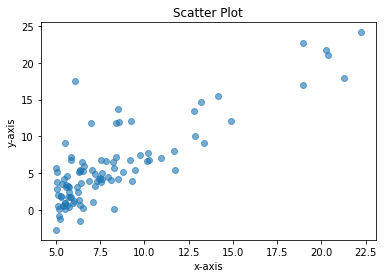

In [3]:
X = df["X"]
y = df["y"]
plt.scatter(X,y,s=None,c=None,alpha = 0.6)
plt.title("Scatter Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

## Correlation Matrix

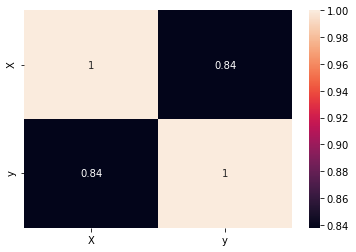

In [4]:
corrMatrix = sns.heatmap(df.corr(), annot=True)

## Convert dataframe to list

In [5]:
X = df["X"].tolist()
y = df["y"].tolist()
N = len(X)
print(X,"\n\n",y)

[6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369] 

 [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077, 3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 1

## Find mean of X and y

In [6]:
sum_x = 0
sum_y = 0 
for i in range(0,N):
    sum_x += X[i]
    sum_y += y[i]

mean_x = sum_x/N
mean_y = sum_y/N

print(mean_x,"",mean_y)

8.159800000000002  5.83913505154639


## Summation of Xy, sum($X^2$), sum($y^2$) and find r

In [7]:
Xy = []
SqX = []
Sqy = []
for i in range(0,N):
    Xy.append(X[i] * y[i])
    SqX.append(X[i] * X[i])
    Sqy.append(y[i] * y[i])

print(sum(Xy))
print(sum(SqX))
print(sum(Sqy))
r = sum(Xy)/((sum(SqX)*sum(Sqy)) ** (1/2))
print("\nr = ",r)

6336.898425319003
7896.182453740001
6222.110372226397

r =  0.9040642647654091


## Standard Deviation of X and y

In [8]:
X1 = []
y1 = []
for i in range(0,N):
    X1.append((X[i] - mean_x) ** 2)
    y1.append((y[i] - mean_y) ** 2)

var1 = sum(X1)/N
var2 = sum(y1)/N

std_X = (var1) ** (1/2)
std_y = (var2) ** (1/2)

print(std_X)
print(std_y)

3.849883995922716
5.48178525707763


## Find slope (m)

In [9]:
m = r * (std_y/std_X) 
print(m)

1.287281944934019


## Find intercept (c)

In [10]:
c = mean_y - (m) * (mean_x)
print(c)

-4.664828162726221


In [11]:
y_pred = []
for i in range(0,N):
    y_pred.append(m * X[i] + c)
print(y_pred)

[3.200593249015128, 2.450880244285556, 6.301011813388711, 4.3502647540357, 2.8783865781981435, 6.126327653461165, 4.959406570378477, 6.3776050891122855, 3.6847399885048135, 1.8418671561372708, 2.6864528402084815, 13.568233305319225, 2.7164465095254435, 6.1591533430569845, 2.5963431040630995, 2.259976331851841, 3.5292363295567837, 1.9390569429797893, 3.6118798304215476, 4.4372850135132405, 3.3022885226649157, 21.428376861086342, 2.4024784431560366, 3.478646149120876, 2.4987671326371004, 19.72272828404877, 11.848424626887375, 9.439920107915825, 12.296398743724414, 23.916692860643803, 2.09649152484522, 3.8175874852220035, 7.240212720412575, 2.919579600436032, 5.905172615321502, 5.547694419213324, 5.756877735265104, 2.5520606051573695, 11.858722882446848, 3.5137889462175744, 2.295376585337526, 4.194889823282165, 10.406668848561274, 2.7675516027393243, 5.407766871798997, 4.465991400885268, 1.8619487544782416, 2.8032093126139968, 10.396370593001798, 2.4687734633201384, 5.041535158465268, 2.1

## Sum Square Error (SSE)

In [12]:
#(actual - predicted) ** 2
SSE = 0
for i in range(0,N):
    SSE += (y[i] - y_pred[i])**2
print(SSE)

881.3031285968033


## Mean Square Error (MSE)

In [13]:
MSE = SSE/N
print(MSE)

9.08559926388457


## SSR (Sum of Squares Residual), SST (Sum of Squares Total)

In [14]:
# SST = (actual - mean)**2
SST = 0
for i in range (0,N):
    SST += (y[i] - mean_y)**2
print("Total Sum of Squares ",SST)

Total Sum of Squares  2914.8470516572247


In [18]:
mean_y_pred = sum(y_pred)/N

#SSR is (y_pred - mean of Y-pred) ** 2
SSR = 0
for i in range(0,N):
    SSR += (y_pred[i] - mean_y_pred) ** 2
print("Sum of Squares of Regression ",SSR)

Sum of Squares of Regression  2382.398338312567

 2033.5439230604215


## Coefficient of Determination (R$^2$)

In [16]:
CoeffOfDet = 1 - (SSE/SST)
print(CoeffOfDet)

0.6976503010352664


## Plot y_actual against y_predicted

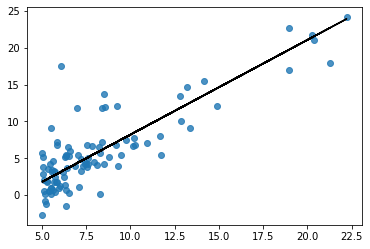

In [17]:
plt.scatter(X,y,s=None,c=None,alpha = 0.8)
plt.plot(X,y_pred,color="Black")
plt.show()